In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# 读取数据

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [4]:
x_valid.shape

(5000, 32, 32, 3)

In [5]:
x_train.shape

(45000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

Text(0.5, 1.0, '3')

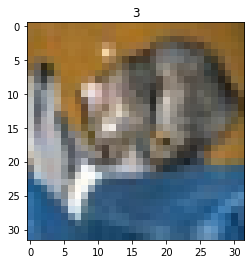

In [8]:
plt.imshow(x_test[0])
plt.title(y_test[0][0])

# 数据处理

In [10]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)

# 定义网络

In [11]:
# 定义卷积神经网络.
model = tf.keras.models.Sequential()
# 2次卷积, 一次池化, 总共3层. 
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 展平
model.add(tf.keras.layers.Flatten())
# 全连接
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# 配置网络

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# 模型训练

In [16]:
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 108s 77ms/step - loss: 1.3403 - acc: 0.5080 - val_loss: 0.9307 - val_acc: 0.6686
Epoch 2/10
1407/1407 [==============================] - 108s 77ms/step - loss: 0.8443 - acc: 0.7034 - val_loss: 0.7805 - val_acc: 0.7242
Epoch 3/10
1407/1407 [==============================] - 109s 78ms/step - loss: 0.6681 - acc: 0.7655 - val_loss: 0.7002 - val_acc: 0.7558
Epoch 4/10
1407/1407 [==============================] - 110s 79ms/step - loss: 0.5391 - acc: 0.8117 - val_loss: 0.6773 - val_acc: 0.7700
Epoch 5/10
1407/1407 [==============================] - 111s 79ms/step - loss: 0.4441 - acc: 0.8411 - val_loss: 0.7184 - val_acc: 0.7686
Epoch 6/10
1407/1407 [==============================] - 109s 78ms/step - loss: 0.3742 - acc: 0.8689 - val_loss: 0.7333 - val_acc: 0.7650
Epoch 7/10
1407/1407 [==============================] - 129s 91ms/step - loss: 0.3000 - acc: 0.8946 - val_loss: 0.7943 - val_acc: 0.7630
Epoch 8/10
1407/1407 [===================

# 绘图展示训练过程

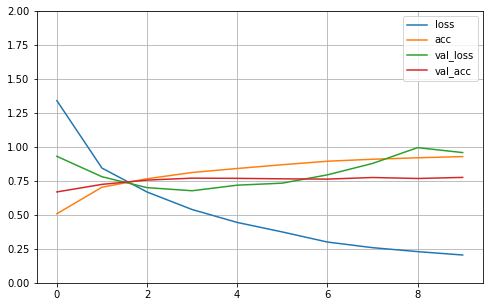

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 2)
plt.show()

# 解决过拟合问题

加入dropout

In [18]:
# 加入dropout减轻过拟合现象.
model = tf.keras.models.Sequential()
# 2次卷积, 一次池化, 总共3层. 
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu', 
                                 ))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 展平
model.add(tf.keras.layers.Flatten())
# 全连接
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 110s 78ms/step - loss: 1.6711 - acc: 0.4012 - val_loss: 1.3361 - val_acc: 0.5528
Epoch 2/10
1407/1407 [==============================] - 110s 78ms/step - loss: 1.0767 - acc: 0.6170 - val_loss: 1.0381 - val_acc: 0.6848
Epoch 3/10
1407/1407 [==============================] - 109s 78ms/step - loss: 0.8737 - acc: 0.6966 - val_loss: 0.8700 - val_acc: 0.7242
Epoch 4/10
1407/1407 [==============================] - 108s 77ms/step - loss: 0.7413 - acc: 0.7450 - val_loss: 0.8474 - val_acc: 0.7612
Epoch 5/10
1407/1407 [==============================] - 108s 77ms/step - loss: 0.6350 - acc: 0.7790 - val_loss: 0.8975 - val_acc: 0.7554
Epoch 6/10
1407/1407 [==============================] - 110s 78ms/step - loss: 0.5621 - acc: 0.8051 - val_loss: 0.7895 - val_acc: 0.7716
Epoch 7/10
1407/1407 [==============================] - 109s 78ms/step - loss: 0.4923 - acc: 0.8278 - val_loss: 0.8439 - val_acc: 0.7824
Epoch 8/10
1407/1407 [===================

# 绘图表示训练过程

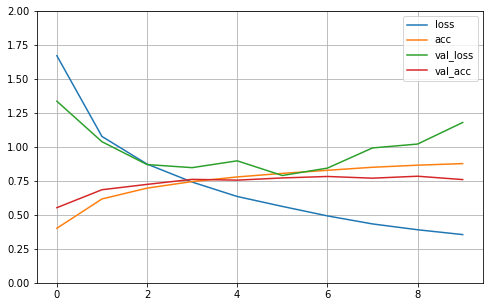

In [19]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 2)
plt.show()

